# IPython Notebook to animate the results provided by our solver of the time-dependent Schroedinger equation for a quantum mechanical point particle

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output

## Set the path/ filename of the file the contains the evolution of the wave function and the file that contains the potential here

In [51]:
inputfilePath = 'hydr_output.txt'
potentialfilePath = 'hydr_potential.txt'
normalisationfilePath = 'hydr_norm_output.txt'

## Read the data from the files and save it in lists of floats

In [45]:
e = 1.602176634*1e-19

potData = []
with open(potentialfilePath,'r') as potentialfile:
    for line in potentialfile:
        potData.append(line.strip())
    a = float(potData[0].split("\t")[1])
    epsilon = float(potData[0].split("\t")[3])
    del potData[0]
    potData = [float(potData[i])*epsilon/e*1e3 for i in range(len(potData))]

plotData = []
with open(inputfilePath,'r') as inputfile: #Read the file at the path specified above
    for line in inputfile: #Iterate over all lines
        plotData.append(line.strip().split('\t')) #Tab is used as seperator between values
    for j in range(len(plotData)): #Cast list items from string to float type
        plotData[j] = [float(plotData[j][i])*epsilon/e*1e3 for i in range(len(plotData[0]))]

## Find the absolute maximum of the wave function over the whole time to use it as the y- maximum of the plot

In [46]:
maximum = 0.0 #Initialise a variable to store the absolute maximum of all wave functions

for i in range(len(plotData)): #Iterate over all time steps
    if max(plotData[i]) > maximum: #If the maximum in the current time step is bigger than the maximum up to here...
        maximum = max(plotData[i]) #...set it as the new maximum

## Generate a series of plots that is shown over time. Each plot contains the wave function at consecutive points in the simulation

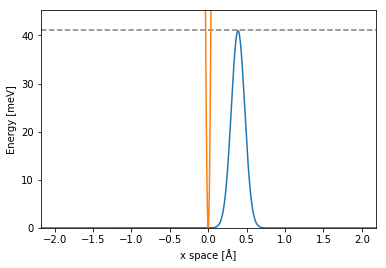

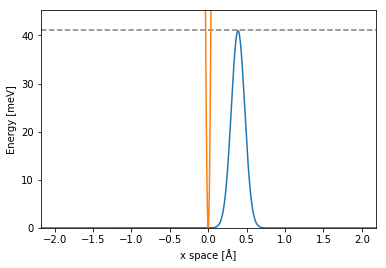

In [47]:
x = np.arange(-(len(plotData[0])-1)/2,(len(plotData[0])-1)/2+1)*a/1e-10 #Setting x-axis here

fig, ax = plt.subplots() #Generate an empty plot
l, = ax.plot([min(x),max(x)],[0,maximum*1.1]) #Set plot range

plt.axhline(max(plotData[0]),linestyle = 'dashed', color = 'grey') #Add a dashed grey line as reference for the maximum of the start wave function

plt.plot(x,potData) #Add the line representing the potential
plt.xlim(min(x),max(x)) #Set the overwritten plot range again
plt.ylim(0,maximum*1.1)
plt.xlabel("x space [Å]")
plt.ylabel("Energy [meV]")

animate = lambda i: l.set_data(x, plotData[i]) #Lambda function that returns the plot data for the i-th plot

for i in range(len(plotData)): #Iterate over all plots
    animate(i)
    clear_output(wait=True)
    display(fig)
    
plt.show()

## Check the normalisation of the wave

In [72]:
normData = []
with open(normalisationfilePath,'r') as normfile:
    for line in normfile:
        normData.append(line.strip().split('\t'))
    stepData = [float(list(np.array(normData).T)[0][i]) for i in range(int(len(normData)/2))]
    normData = [float(list(np.array(normData).T)[1][i]) for i in range(int(len(normData)/2))]

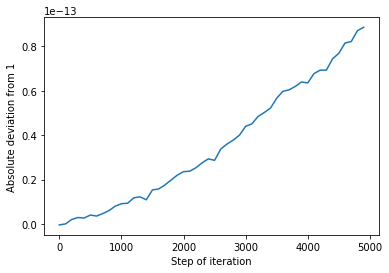

In [74]:


plt.plot(stepData,normData)
plt.xlabel("Step of iteration")
plt.ylabel("Absolute deviation from 1")

plt.show()